# Unsupervised learning & clustering
-----

#### 1. Reading data
The woldbank_development_2015.csv (can be found in the same folder with this notebook) file contains the World Development Indicators for the 2015 year, downloaded from [The World Bank's webpage](https://databank.worldbank.org/source/world-development-indicators#).


 - Look at the data in any text editor. Build up an overall sense how the data is built up and how is the missing values are represented.
 - Read the file into a pandas dataframe and tell pandas which special pattern means if a value is missing. 
 - The data is in a long format. Convert it into a wide format, where each row is a single country and the columns are the measured features, the Series Codes (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)!
 - Keep only those rows, which represents counties and NOT regions. Luckily they are well separated in the order they occur!
 - Convert the features to numeric format, which will be needed for modeling!

-----

#### 2. Data preprocessing and inspection

 - Visualize the missing values!
 - Keep only those countries which has less than 700 missing features in the original table and keep features which were missing in less than 20 country in the original table
 - Visualize the missing values again! Now really only a few entries are missing. Impute the missing values with its feature's mean value!
 - How many counties and features do we have left?
 - Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Norway?  

-----

#### 3. PCA
 - Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
 - Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
 - It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).

-----

#### 4. T-SNE
 - Perform T-SNE on the scaled data with 2 components
 - Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
 - Highlight Hungary and Norway! Which countries are the closest one to Hungary and Norway? 

-----

#### 5. Hierarchical clustering

 - Perform hierarchical clustering on the filtered and scaled data (hint: use seaborn)
 - Try to plot in a way that all country's name is visible
 - Write down your impressions that you got from this plot!

-----

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# Task 1

In [2]:
df = pd.read_csv('woldbank_development_2015.csv', na_values='..')

In [3]:
df.head()

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,30.100000
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,71.500000
2,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,64.573354
3,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,92.500000
4,Afghanistan,AFG,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


In [4]:
# dropping the region rows, starts at row number 311829
df = df.drop([i for i in range(311829, len(df))])

In [5]:
# creating the wide table
df_pivoted = df.pivot_table(index=['Country Name', 'Country Code'], columns='Series Code', values='2015 [YR2015]')

In [6]:
df_pivoted.head()

,Series Code,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.FRST.K2,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,590.067055,12.125821,379100.000000,58.067580,7.765000e+06,0.225638,11.893821,2723762.0,0.222100,13500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,NaN,107.831254,11743.000488,42.857666,6.151000e+05,0.213524,22.448904,142600.0,2.956204,7715.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,DZA,10.117997,23.368498,414563.984375,17.405929,7.462100e+06,0.187830,3.133046,2686242.0,0.419987,19560.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,ASM,NaN,NaN,49.000001,24.500000,3.000000e+03,0.053752,15.000000,NaN,9.500000,175.400009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,NaN,NaN,188.099995,40.021275,8.100000e+02,0.010383,1.723404,NaN,NaN,160.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# converting values to numeric
df2 = df_pivoted.apply(pd.to_numeric, errors='ignore')

In [8]:
df2.head()

,Series Code,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.FRST.K2,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,590.067055,12.125821,379100.000000,58.067580,7.765000e+06,0.225638,11.893821,2723762.0,0.222100,13500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,NaN,107.831254,11743.000488,42.857666,6.151000e+05,0.213524,22.448904,142600.0,2.956204,7715.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,DZA,10.117997,23.368498,414563.984375,17.405929,7.462100e+06,0.187830,3.133046,2686242.0,0.419987,19560.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,ASM,NaN,NaN,49.000001,24.500000,3.000000e+03,0.053752,15.000000,NaN,9.500000,175.400009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,NaN,NaN,188.099995,40.021275,8.100000e+02,0.010383,1.723404,NaN,NaN,160.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 2

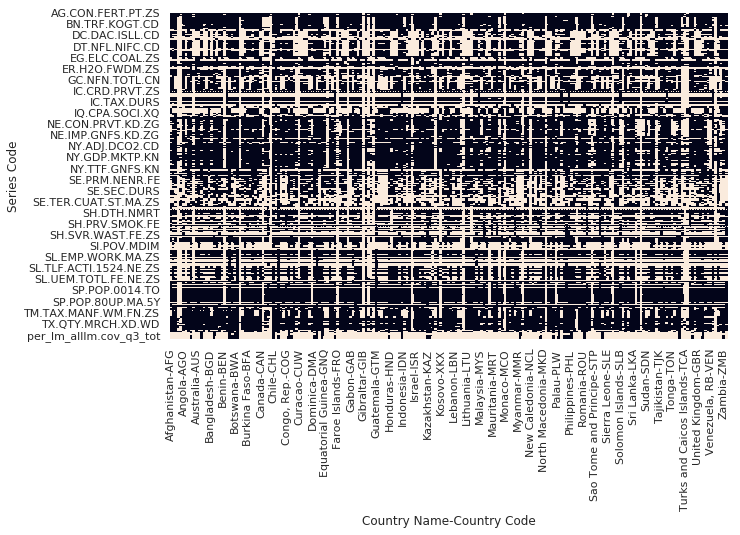

In [9]:
# visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull().T, cbar=False)

In [10]:
# missing values per row
df2.isnull().sum(axis=1)

Country Name              Country Code
Afghanistan               AFG              456
Albania                   ALB              347
Algeria                   DZA              431
American Samoa            ASM             1182
Andorra                   AND             1076
Angola                    AGO              445
Antigua and Barbuda       ATG              716
Argentina                 ARG              378
Armenia                   ARM              289
Aruba                     ABW              930
Australia                 AUS              433
Austria                   AUT              393
Azerbaijan                AZE              389
Bahamas, The              BHS              550
Bahrain                   BHR              520
Bangladesh                BGD              384
Barbados                  BRB              629
Belarus                   BLR              307
Belgium                   BEL              408
Belize                    BLZ              390
Benin                

In [11]:
# dropping rows with more than 700 missing values
df3 = df2[df2.isna().sum(axis=1) < 700]

In [12]:
# dropping features with more than 20 missing accurences
df3 = df3[df2.columns[df2.isna().sum(axis=0) < 20]]

In [13]:
df3.head()

,Series Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,...,TX.VAL.MRCH.HI.ZS,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,3.791000e+05,58.067580,7.765000e+06,0.225638,11.893821,13500.0,2.067825,652860.0,137.04,119.00,...,7.634950,19.551838,1.843829,9.281692,0.018813,72.813213,0.010314,0.000000,5.714050e+08,416.136244
Albania,ALB,1.174300e+04,42.857666,6.151000e+05,0.213524,22.448904,7715.0,28.156934,27400.0,173.61,145.71,...,73.135599,3.855556,2.657788,22.506783,0.023478,0.074117,0.033131,0.502061,2.015814e+09,733.006650
Algeria,DZA,4.145640e+05,17.405929,7.462100e+06,0.187830,3.133046,19560.0,0.821248,2381740.0,152.18,151.00,...,79.180817,14.776261,3.317262,5.308423,5.023353,0.879290,0.247934,0.061628,3.456334e+10,157.358029
Angola,AGO,5.919000e+05,47.477340,4.900000e+06,0.175726,3.930376,578560.0,46.407315,1246700.0,193.89,181.06,...,39.236115,54.378420,45.994243,0.145032,0.032332,8.184357,5.063523,1.321941,3.270146e+10,418.900773
Argentina,ARG,1.487000e+06,54.335712,3.920000e+07,0.908839,14.323873,271120.0,9.906858,2736690.0,143.54,129.02,...,37.060884,33.044302,16.943156,1.938971,27.992545,4.744787,2.206410,1.902269,5.667227e+10,215.572681


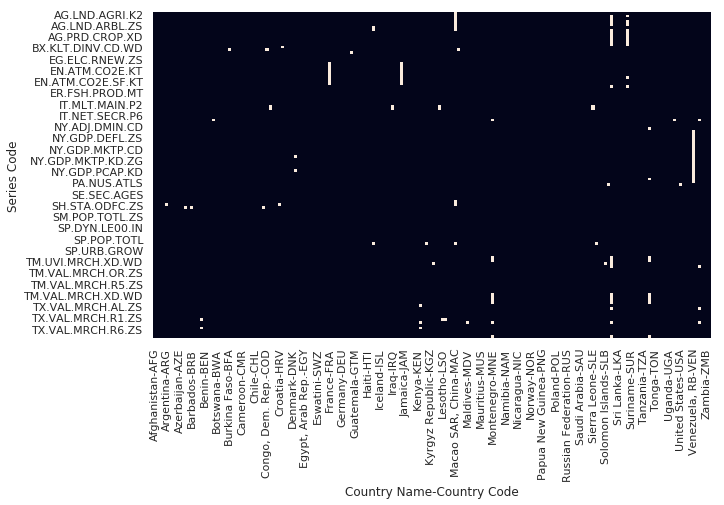

In [14]:
# missing values of the cleared up table
plt.figure(figsize=(10, 6))
sns.heatmap(df3.isnull().T, cbar=False)

In [15]:
# imputing the table with the average values
df3 = df3.fillna(df2.mean())

In [16]:
df3.shape

(178, 116)

We have 178 countries and 116 features left

In [17]:
# the Series Names
for col in list(df3.columns):
    print(list(df[df['Series Code']==col]['Series Name'])[0])

Agricultural land (sq. km)
Agricultural land (% of land area)
Arable land (hectares)
Arable land (hectares per person)
Arable land (% of land area)
Forest area (sq. km)
Forest area (% of land area)
Land area (sq. km)
Crop production index (2004-2006 = 100)
Food production index (2004-2006 = 100)
Livestock production index (2004-2006 = 100)
Surface area (sq. km)
Foreign direct investment, net inflows (BoP, current US$)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Access to electricity (% of population)
Renewable electricity output (% of total electricity output)
Renewable energy consumption (% of total final energy consumption)
CO2 emissions from gaseous fuel consumption (kt)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions (kt)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions (metric tons per capita)
CO2 emissions from solid fuel consum

Looking at these properties countries similar to Hungary should have similar gdp, agriculture, population etc. I would say these countries are probably the neighbouring ones, the ex-socialist states in the Balkan. They have similar geographical properties because of their location and similar social and cultural status due to their history.<br/>
The same should be true with the countries similar to Norway so I think we should see some of it's neighbours and northern island countries.

# Task 3

In [18]:
# performing PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
embedding = pca.fit_transform(df3)

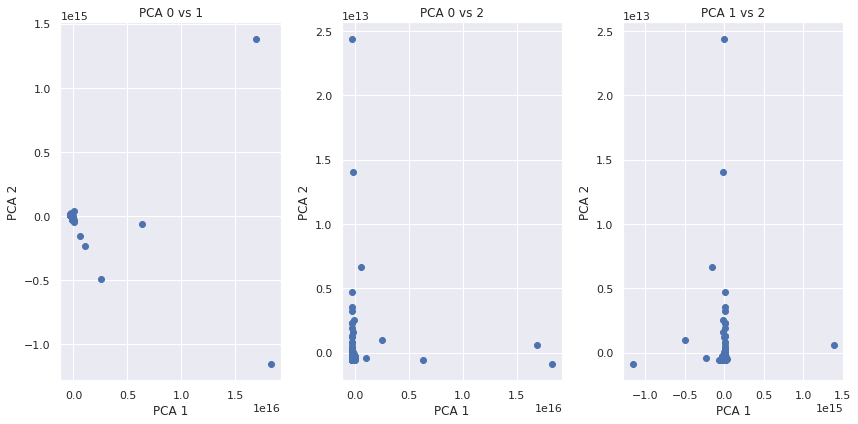

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.scatter(embedding[:,0], embedding[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 0 vs 1')

plt.subplot(132)
plt.scatter(embedding[:,0], embedding[:,2])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 0 vs 2')

plt.subplot(133)
plt.scatter(embedding[:,1], embedding[:,2])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 1 vs 2')

plt.tight_layout()

In [20]:
# normalizing the data then performing PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df3_norm = scaler.fit_transform(df3)

In [21]:
df3_norm.shape

(178, 116)

In [22]:
embedding_norm = pca.fit_transform(df3_norm)

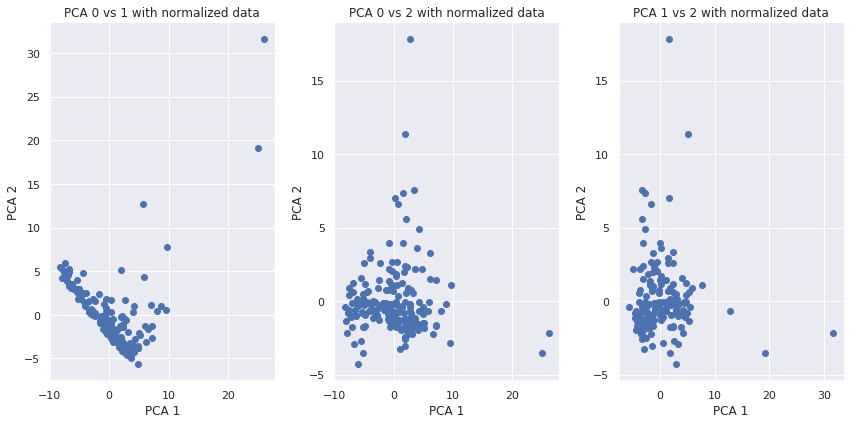

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.scatter(embedding_norm[:,0], embedding_norm[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 0 vs 1 with normalized data')

plt.subplot(132)
plt.scatter(embedding_norm[:,0], embedding_norm[:,2])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 0 vs 2 with normalized data')

plt.subplot(133)
plt.scatter(embedding_norm[:,1], embedding_norm[:,2])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 1 vs 2 with normalized data')

plt.tight_layout()

# Task 4

In [24]:
# performing TSNE
from sklearn.manifold import TSNE

df3_tsne = TSNE(n_components=2).fit_transform(df3_norm)

In [25]:
df3.index = df3.index.get_level_values('Country Name')

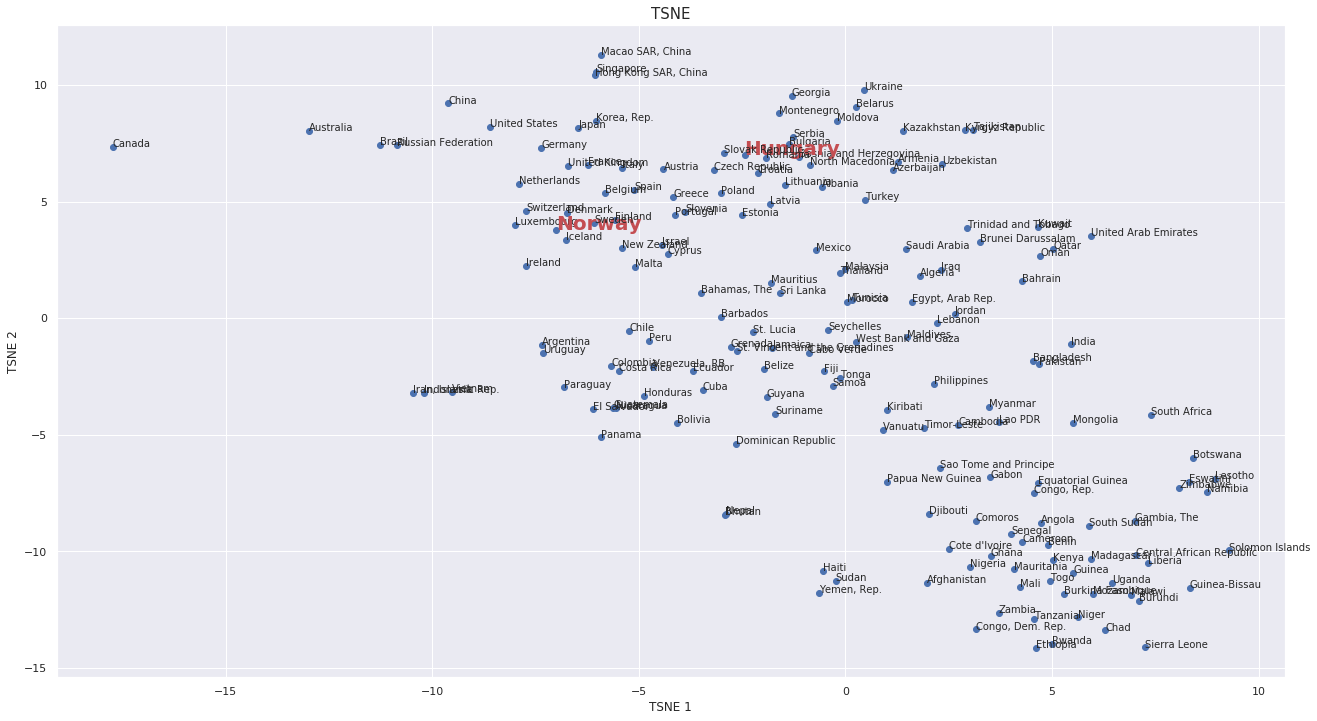

In [26]:
fig, ax = plt.subplots(figsize=(22,12))
ax.scatter(df3_tsne[:,0], df3_tsne[:,1])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE',size=15)

for i, txt in enumerate(list(df3.index)):
    
    if txt in ['Hungary', 'Norway']:
        ax.annotate(txt, (df3_tsne[:,0][i], df3_tsne[:,1][i]), color='r', fontweight='bold', size=20)
    else:
        ax.annotate(txt, (df3_tsne[:,0][i], df3_tsne[:,1][i]))

Slovakia, Poland, Bulgaria and Romania are the closest to Hungary. Denmark, Iceland, New Sweden and Finland are in the neighbourhood of Norway

# Task 5

In [27]:
df3_norm = pd.DataFrame(df3_norm, index=df3.index)

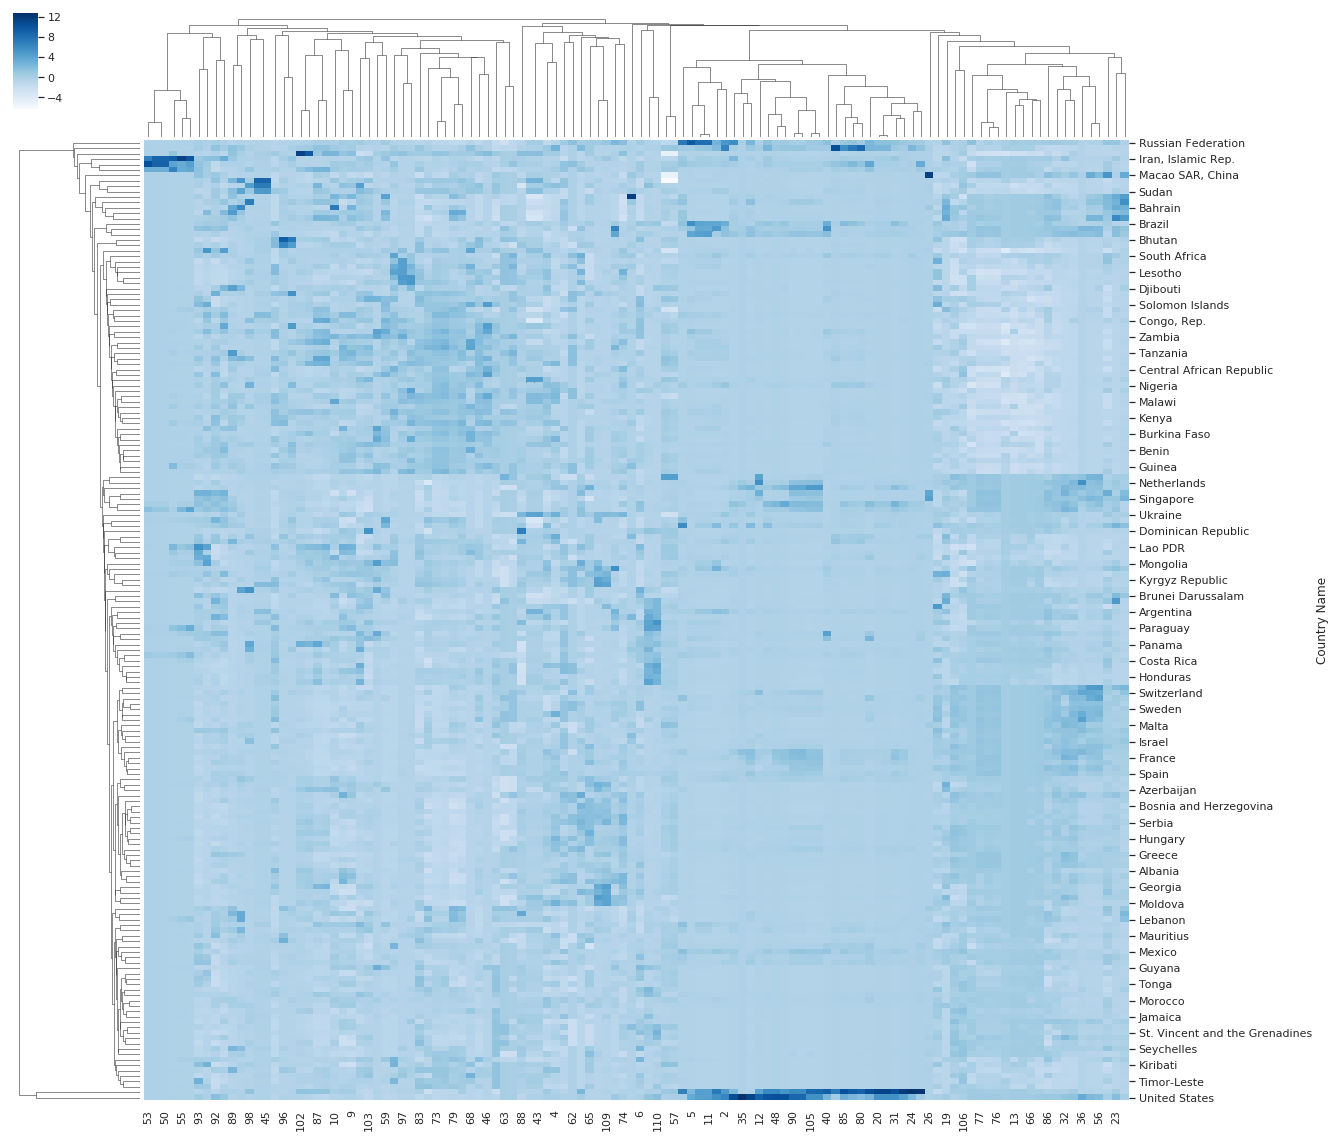

In [28]:
sns.clustermap(df3_norm, cmap="Blues", figsize=(20,20))

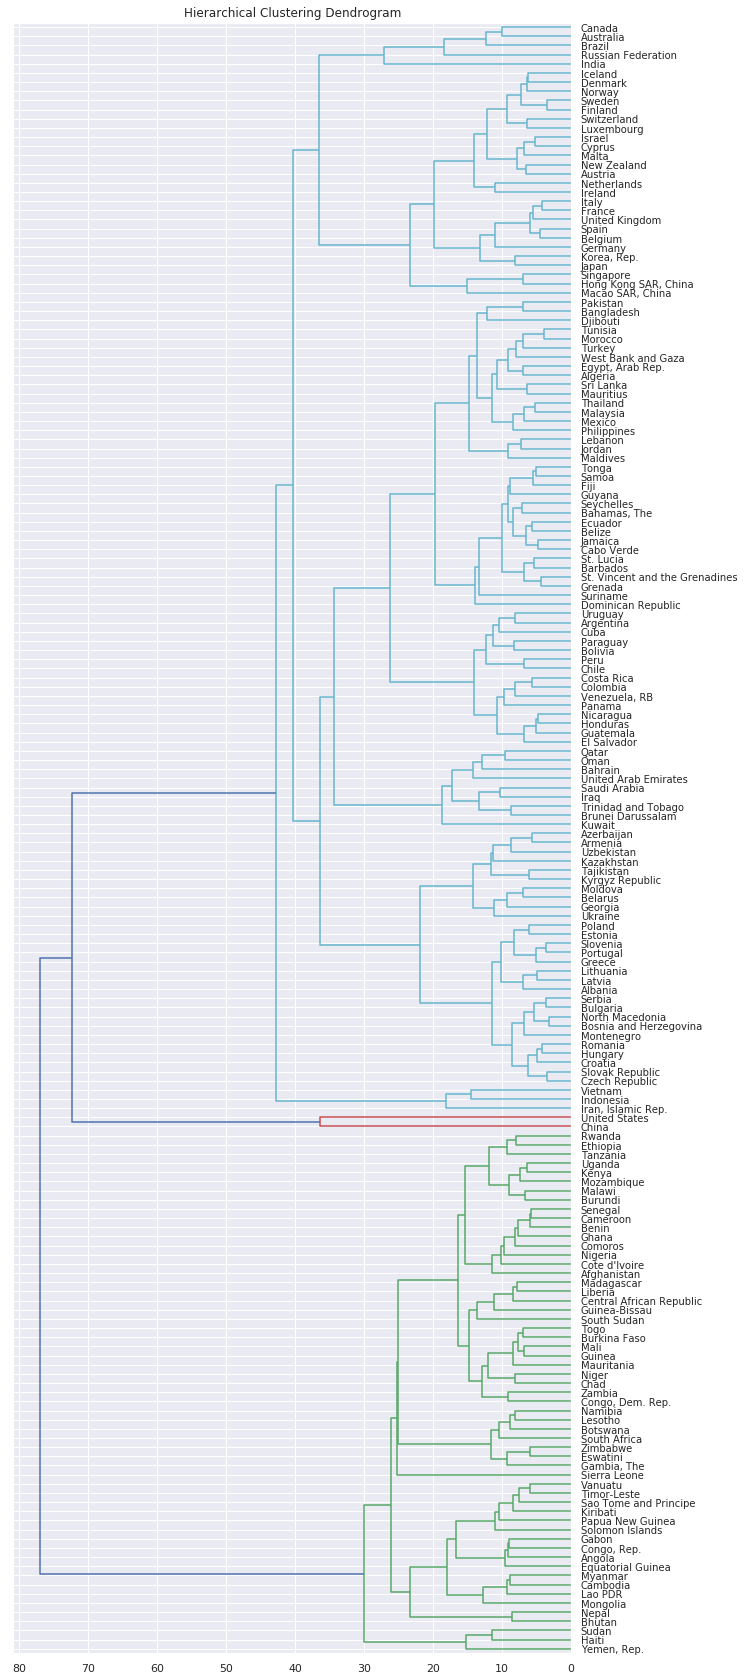

In [29]:
# hierarchical clustering using scipy
from scipy.cluster.hierarchy import dendrogram, linkage


Z = linkage(df3_norm, 'ward')
# had to do it this big to be able to read the countries
plt.figure(figsize=(10,30))
plt.title('Hierarchical Clustering Dendrogram')
d = dendrogram(Z, labels=df3_norm.index, orientation='left', leaf_font_size=10)

If we take a look at the countries in the two big clusters we can see that the upper ones are the more developed countries.
In the smaller, red cluster we have two countries USA and China and India, these are two of the three most populated countries, this might be why they are in here. Hungary and the baltic countries make up a smaller cluster, these countries are neighbours and have similar geographical and financial properties.